In [2]:
# !pip install --quiet 'matplotlib<3.7' scanpy python-igraph
!pip install --quiet 'matplotlib<3.7' scanpy python-igraph leidenalg
!pip install matplotlib==3.1.3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scipy as sp
import numpy as np
import warnings

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 57.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 7.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 14.3 MB/s eta 0:00:00
  Preparing metada

In [3]:
breast_10x_celltype_labeled = sc.read_h5ad("/content/drive/MyDrive/CSCB final/breast_10x_celltype_labeled.h5ad")
breast_pip_celltype_labeled = sc.read_h5ad("/content/drive/MyDrive/CSCB final/breast_pip_celltype_labeled.h5ad")

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
breast_10x_celltype_labeled.var

,Gene stable ID,Gene name
ENSG00000238009,ENSG00000238009,ENSG00000238009
ENSG00000239945,ENSG00000239945,ENSG00000239945
LINC01409,ENSG00000237491,LINC01409
FAM87B,ENSG00000177757,FAM87B
LINC00115,ENSG00000225880,LINC00115
...,...,...
ENSG00000278384,ENSG00000278384,ENSG00000278384
ENSG00000276345,ENSG00000276345,ENSG00000276345
ENSG00000277856,ENSG00000277856,ENSG00000277856
ENSG00000275063,ENSG00000275063,ENSG00000275063


In [5]:
breast_10x_celltype_labeled.var

,Gene stable ID,Gene name
ENSG00000238009,ENSG00000238009,ENSG00000238009
ENSG00000239945,ENSG00000239945,ENSG00000239945
LINC01409,ENSG00000237491,LINC01409
FAM87B,ENSG00000177757,FAM87B
LINC00115,ENSG00000225880,LINC00115
...,...,...
ENSG00000278384,ENSG00000278384,ENSG00000278384
ENSG00000276345,ENSG00000276345,ENSG00000276345
ENSG00000277856,ENSG00000277856,ENSG00000277856
ENSG00000275063,ENSG00000275063,ENSG00000275063


In [11]:
breast_10x_celltype_labeled.var_names_make_unique()

In [12]:
breast_pip_celltype_labeled.var_names_make_unique()

/usr/local/lib/python3.10/dist-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


In [18]:
merged_data = breast_pip_celltype_labeled.concatenate(breast_10x_celltype_labeled, index_unique = None, batch_categories = ["pip_seq", "10x"])

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [19]:
merged_data.var

,Gene stable ID-10x,Gene name-10x,Gene stable ID-pip_seq,Gene name-pip_seq
ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009.6,ENSG00000238009
ENSG00000239945,ENSG00000239945,ENSG00000239945,ENSG00000239945.1,ENSG00000239945
LINC01409,ENSG00000237491,LINC01409,ENSG00000237491.10,LINC01409
FAM87B,ENSG00000177757,FAM87B,ENSG00000177757.2,FAM87B
LINC00115,ENSG00000225880,LINC00115,ENSG00000225880.5,LINC00115
...,...,...,...,...
MT-ND4L,ENSG00000212907,MT-ND4L,ENSG00000212907.2,MT-ND4L
MT-ND4,ENSG00000198886,MT-ND4,ENSG00000198886.2,MT-ND4
MT-ND5,ENSG00000198786,MT-ND5,ENSG00000198786.2,MT-ND5
MT-ND6,ENSG00000198695,MT-ND6,ENSG00000198695.2,MT-ND6


In [22]:
#Creating another copy of val_data as we will be performing various processes on val_data
merged_data_original = merged_data.copy()

#filtering out genes in fewer than 5 cells from val_data
sc.pp.filter_genes(merged_data, min_cells = 5)
#normalzing data on a scale of 10,000 and applying log 
sc.pp.normalize_total(merged_data,target_sum=1e4)
sc.pp.log1p(merged_data)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [23]:

## define a function to remove mitochondrial and ribosomal genes
def mito_rib_genes(adQ):
    adata = adQ.copy()
    # define the genes that we want to ignore. these are boolean arrays
    mito_genes = adata.var_names.str.startswith('MT-')
    ribo_genes = adata.var_names.str.startswith(("RPl","RPS"))
    malat_gene = adata.var_names.str.startswith("MALAT1")
    # merge them such that if a gene meets any of these critera, then the resulting entry is True
    remove = np.add(mito_genes, ribo_genes)
    remove = np.add(remove, malat_gene)
    #  invert this to keep only the genes that do not pass these criteria
    keep = np.invert(remove)
    # show the number of genes we are removing
    print(len(keep) - np.count_nonzero(keep))
    # subset adata to remove the genes we specified above
    adata = adata[:,keep].copy()
    return adata

## define a function to check if mitochondrial and ribosomal genes were properly removed
## output True if there is any genes that needed to be removed (False = good)
def checkremoval_mito_rib_genes(adQ):
  adata = adQ.copy()
  # define the genes that we want to ignore. these are boolean arrays
  mito_genes = adata.var_names.str.startswith('MT-')
  ribo_genes = adata.var_names.str.startswith(("RPl","RPS"))
  malat_gene = adata.var_names.str.startswith("MALAT1")
  # merge them such that if a gene meets any of these critera, then the resulting entry is True
  remove = np.add(mito_genes, ribo_genes)
  remove = np.add(remove, malat_gene)
  print(True in remove)

In [24]:

## remove mitochondrial and ribosomal genes
merged_data = mito_rib_genes(merged_data)
checkremoval_mito_rib_genes(merged_data)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


60
False


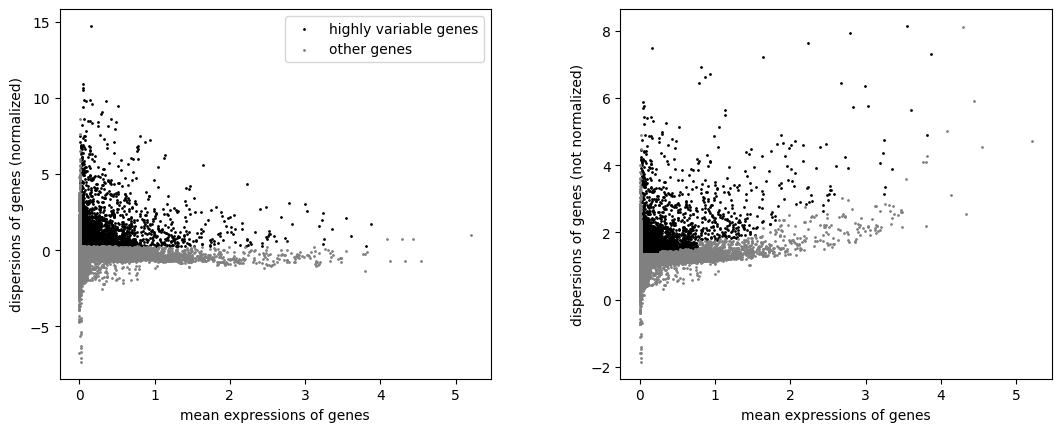

In [25]:
#Identifying HVG
sc.pp.highly_variable_genes(merged_data, min_mean=0.0125, max_mean=4, min_disp=0.25)
sc.pl.highly_variable_genes(merged_data)

In [27]:
## scale gene exprression
sc.pp.scale(merged_data)

In [28]:
seed = 0

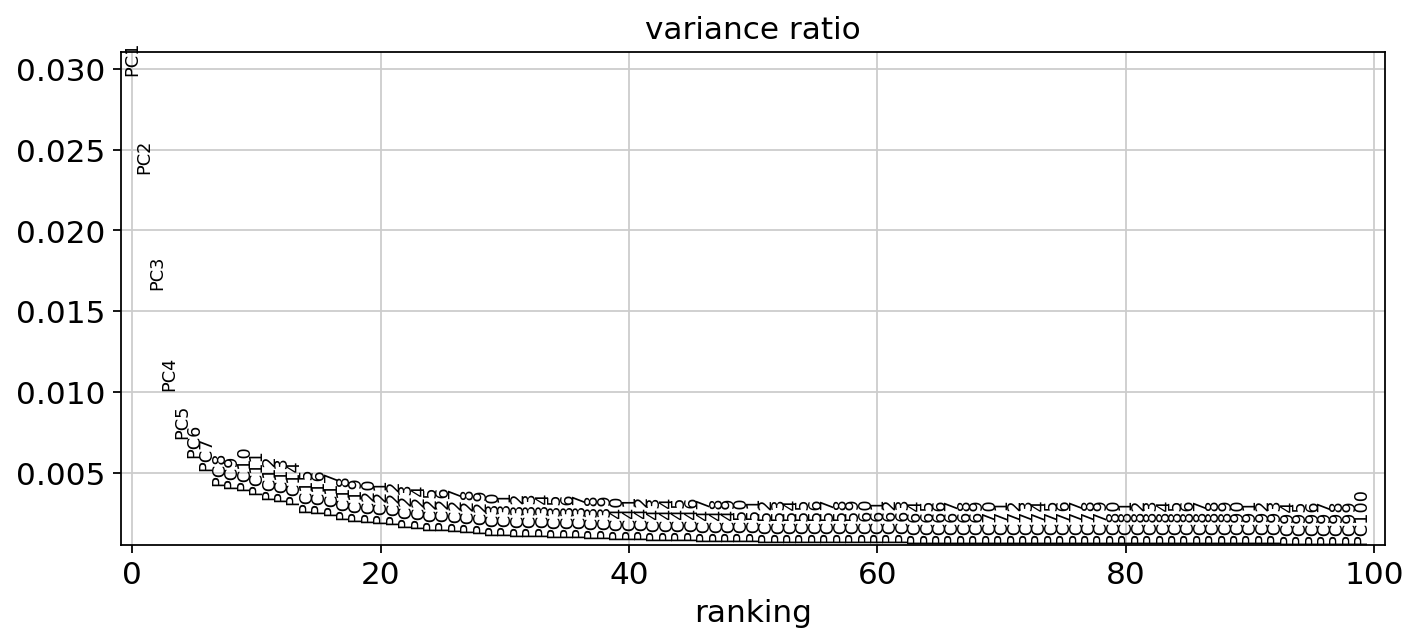

In [29]:
## pca
sc.tl.pca(merged_data, n_comps = 100, random_state = seed)
sc.set_figure_params(figsize="10, 4")
sc.pl.pca_variance_ratio(merged_data, 100)
sc.set_figure_params()

In [30]:
## knearest neighbors and UMAP
npcs = 20
nknns = 15
sc.pp.neighbors(merged_data, n_neighbors = nknns, n_pcs = npcs)
sc.tl.umap(merged_data, .5, random_state = seed)

In [32]:
!pip install bbknn

#applying BBKNN to account for batch effects
sc.pp.pca(merged_data)
sc.external.pp.bbknn(merged_data, batch_key='batch')
sc.tl.umap(merged_data)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.4/647.4 kB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.2-cp310-cp310-linux_x86_64.whl size=582713 sha256=5e8a63ec927f62d182b5f507cc910429d28fa2c47c53646f6cd969e56fc87151
  Stored in directory: /root/.cache/pip/wheels/7a/d9/59/473fa56df8e39430eeda369500b4e7127f5b243ba24c3c4297
Successfully built annoy


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


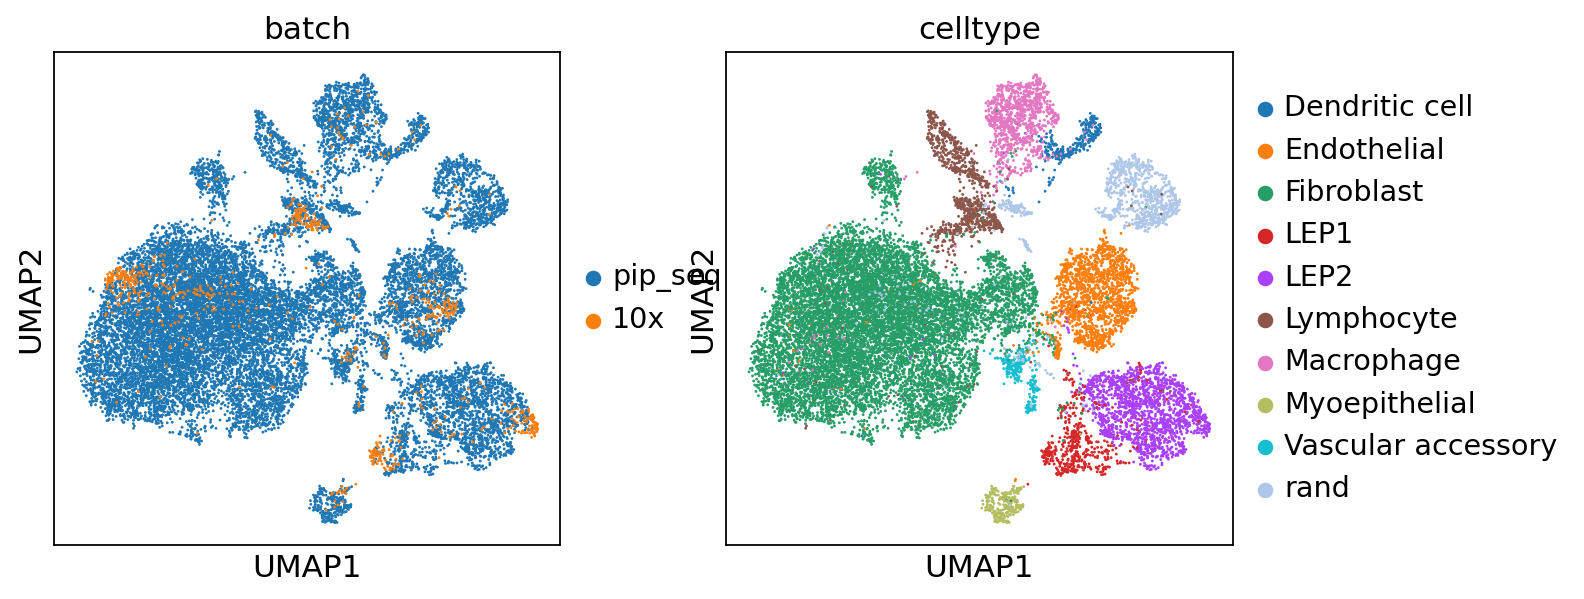

In [34]:
sc.pl.umap(merged_data, color=['batch', 'celltype'])

In [33]:
#ingest requires separation of new and ref data set in order to contextualize the new data set with ref data lebels
merged_data_ref = merged_data[merged_data.obs.batch == "pip_seq"].copy()

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


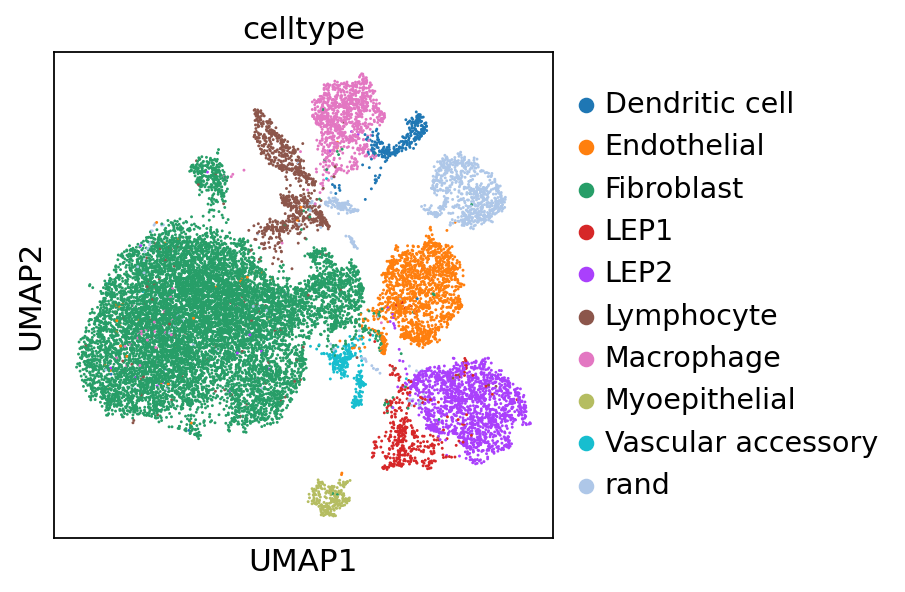

In [35]:
#UMAP plot of the ref data set
sc.pl.umap(merged_data_ref, color='celltype')

In [36]:
#getting the "new" data set from the concatenated data set
merged_data_new = merged_data[merged_data.obs.batch == "10x"].copy()

In [37]:
#ingest requires var_names of data set to be aligned
var_names = merged_data_ref.var_names.intersection(merged_data_new.var_names)
merged_data_ref = merged_data_ref[:, var_names]
merged_data_new = merged_data_new[:, var_names]

In [39]:
merged_data_new.obs['celltype_orig'] = merged_data_new.obs["celltype"]  # save the original cell type
sc.tl.ingest(merged_data_new, merged_data_ref, obs='celltype')

/usr/local/lib/python3.10/dist-packages/pynndescent/pynndescent_.py:937: UserWarning: Failed to correctly find n_neighbors for some samples. Results may be less than ideal. Try re-running with different parameters.
  warn(


In [40]:
adata_concat = merged_data_ref.concatenate(merged_data_new)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


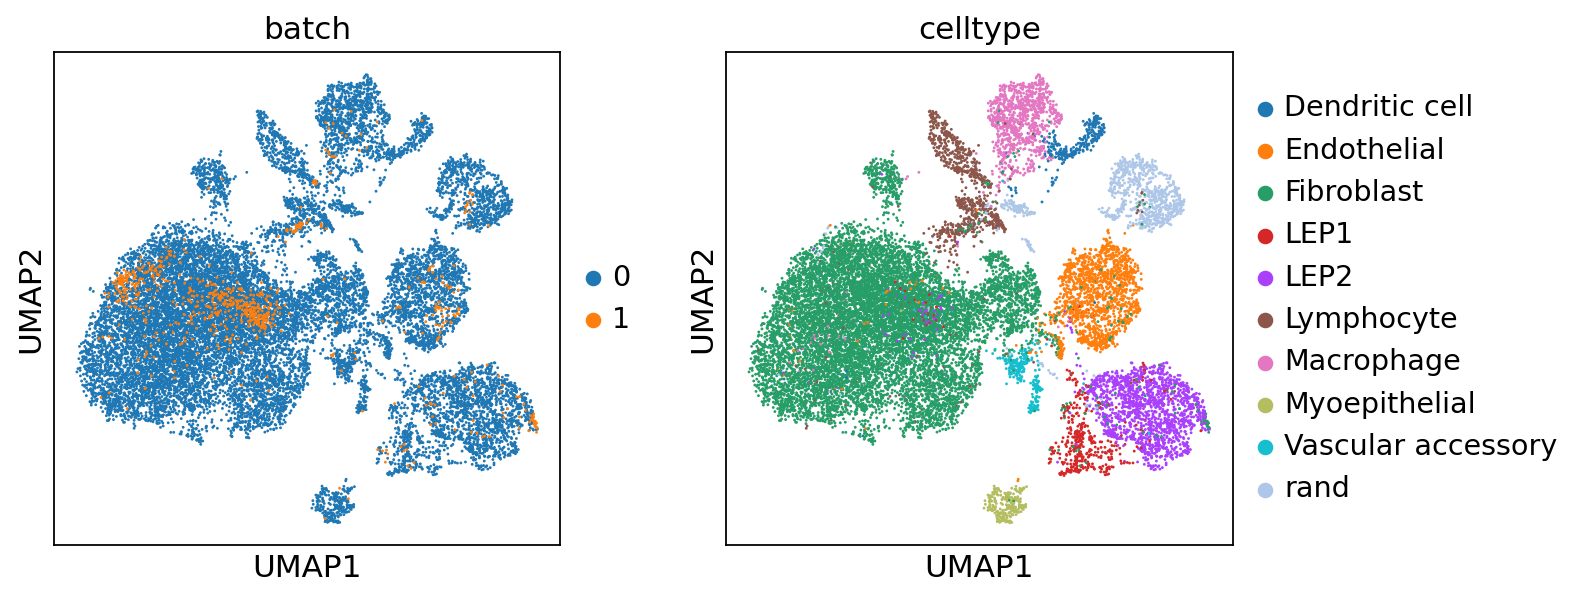

In [41]:
sc.pl.umap(adata_concat, color=['batch', 'celltype'])

In [45]:
adata_concat.obs

,CellID,celltype,batch,celltype_orig
0-0,AGCAAGTCAAATCATA,LEP1,0,NaN
1-0,CAGCAGGGATTCAGGG,LEP1,0,NaN
2-0,CATCCAGCACTCAAAA,LEP1,0,NaN
3-0,ATACATGAACGTACAC,LEP1,0,NaN
4-0,ATTGACTAAAGCAGTC,LEP1,0,NaN
...,...,...,...,...
787-1,TTTCCTCTCCCTGGTT-3,Fibroblast,1,Fibroblast
788-1,TTTCGATGTTGCGAAG-3,Fibroblast,1,LEP2
789-1,TTTGACTCAGTTGGTT-3,Fibroblast,1,Fibroblast
790-1,TTTGACTTCTTCCCGA-3,Endothelial,1,Endothelial


In [46]:
adata_query = adata_concat[adata_concat.obs.batch == "1"]

In [47]:
adata_query.obs

,CellID,celltype,batch,celltype_orig
0-1,AAACCCACACGGCGTT-3,Lymphocyte,1,Macrophage
1-1,AAACCCATCGACCATA-3,Fibroblast,1,LEP1
2-1,AAACGAATCGAGTCTA-3,Fibroblast,1,Fibroblast
3-1,AAAGAACGTCATATGC-3,Fibroblast,1,Endothelial
4-1,AAAGGGCGTCCACGCA-3,Fibroblast,1,Fibroblast
...,...,...,...,...
787-1,TTTCCTCTCCCTGGTT-3,Fibroblast,1,Fibroblast
788-1,TTTCGATGTTGCGAAG-3,Fibroblast,1,LEP2
789-1,TTTGACTCAGTTGGTT-3,Fibroblast,1,Fibroblast
790-1,TTTGACTTCTTCCCGA-3,Endothelial,1,Endothelial


In [48]:
# store count for each condition and celltype as pd DataFrame using pd Series attributes
count = pd.DataFrame({'count': adata_query.obs['celltype'].value_counts().sort_index()}).reset_index()
# store frequency for each condition and celltype as pd DataFrame using pd Series attributes
freq = pd.DataFrame({'freq': adata_query.obs['celltype'].value_counts(normalize = True).sort_index()}).reset_index()
# multiple frequency by 100 to represent %
freq['freq'] = freq['freq'] * 100
count = count.rename(columns = {'level_1': 'celltype'})
freq = freq.rename(columns = {'level_1': 'celltype'})

In [58]:
count.rename({'index': 'celltype'}, axis=1, inplace=True)
freq.rename({'index': 'celltype'}, axis=1, inplace=True)

In [56]:
count

,celltype,count
0,Dendritic cell,3
1,Endothelial,51
2,Fibroblast,579
3,LEP1,20
4,LEP2,62
5,Lymphocyte,48
6,Macrophage,13
7,Myoepithelial,4
8,Vascular accessory,5
9,rand,7


In [59]:
freq

,celltype,freq
0,Dendritic cell,0.378788
1,Endothelial,6.439394
2,Fibroblast,73.106061
3,LEP1,2.525253
4,LEP2,7.828283
5,Lymphocyte,6.060606
6,Macrophage,1.641414
7,Myoepithelial,0.505051
8,Vascular accessory,0.631313
9,rand,0.883838


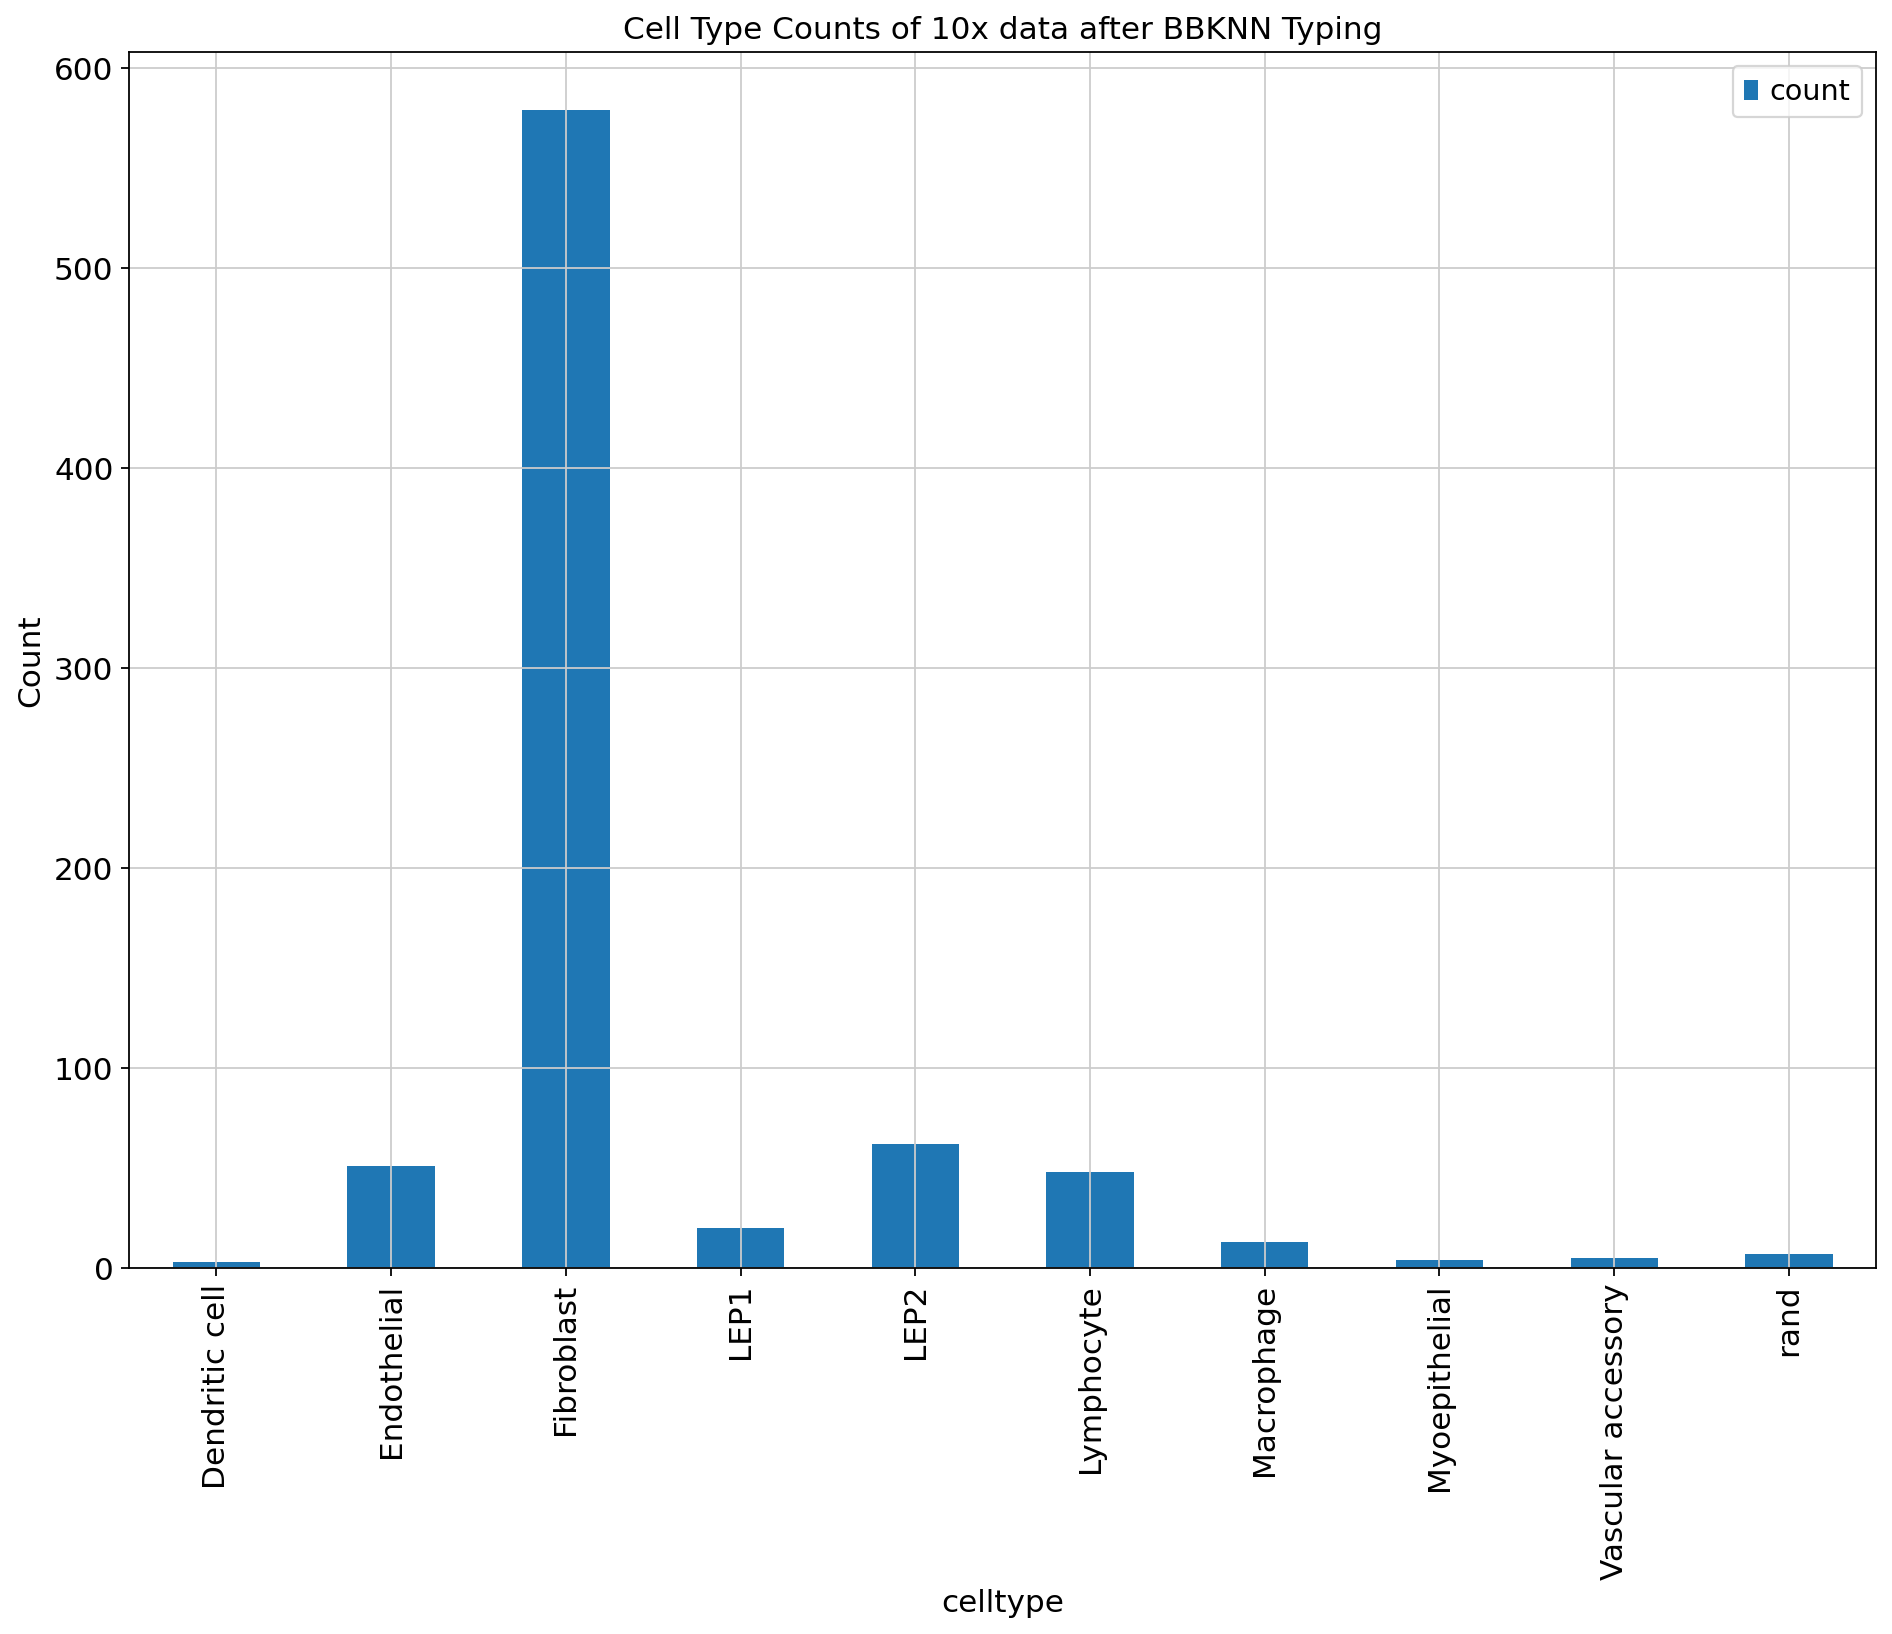

In [71]:
fig, ax = plt.subplots(figsize=(14, 10)) 

count.plot(x='celltype', y='count', kind='bar', ax=ax)

# Add labels and title
plt.xlabel('celltype')
plt.ylabel('Count')
plt.title('Cell Type Counts of 10x data after BBKNN Typing')

# Show the plot
plt.show()

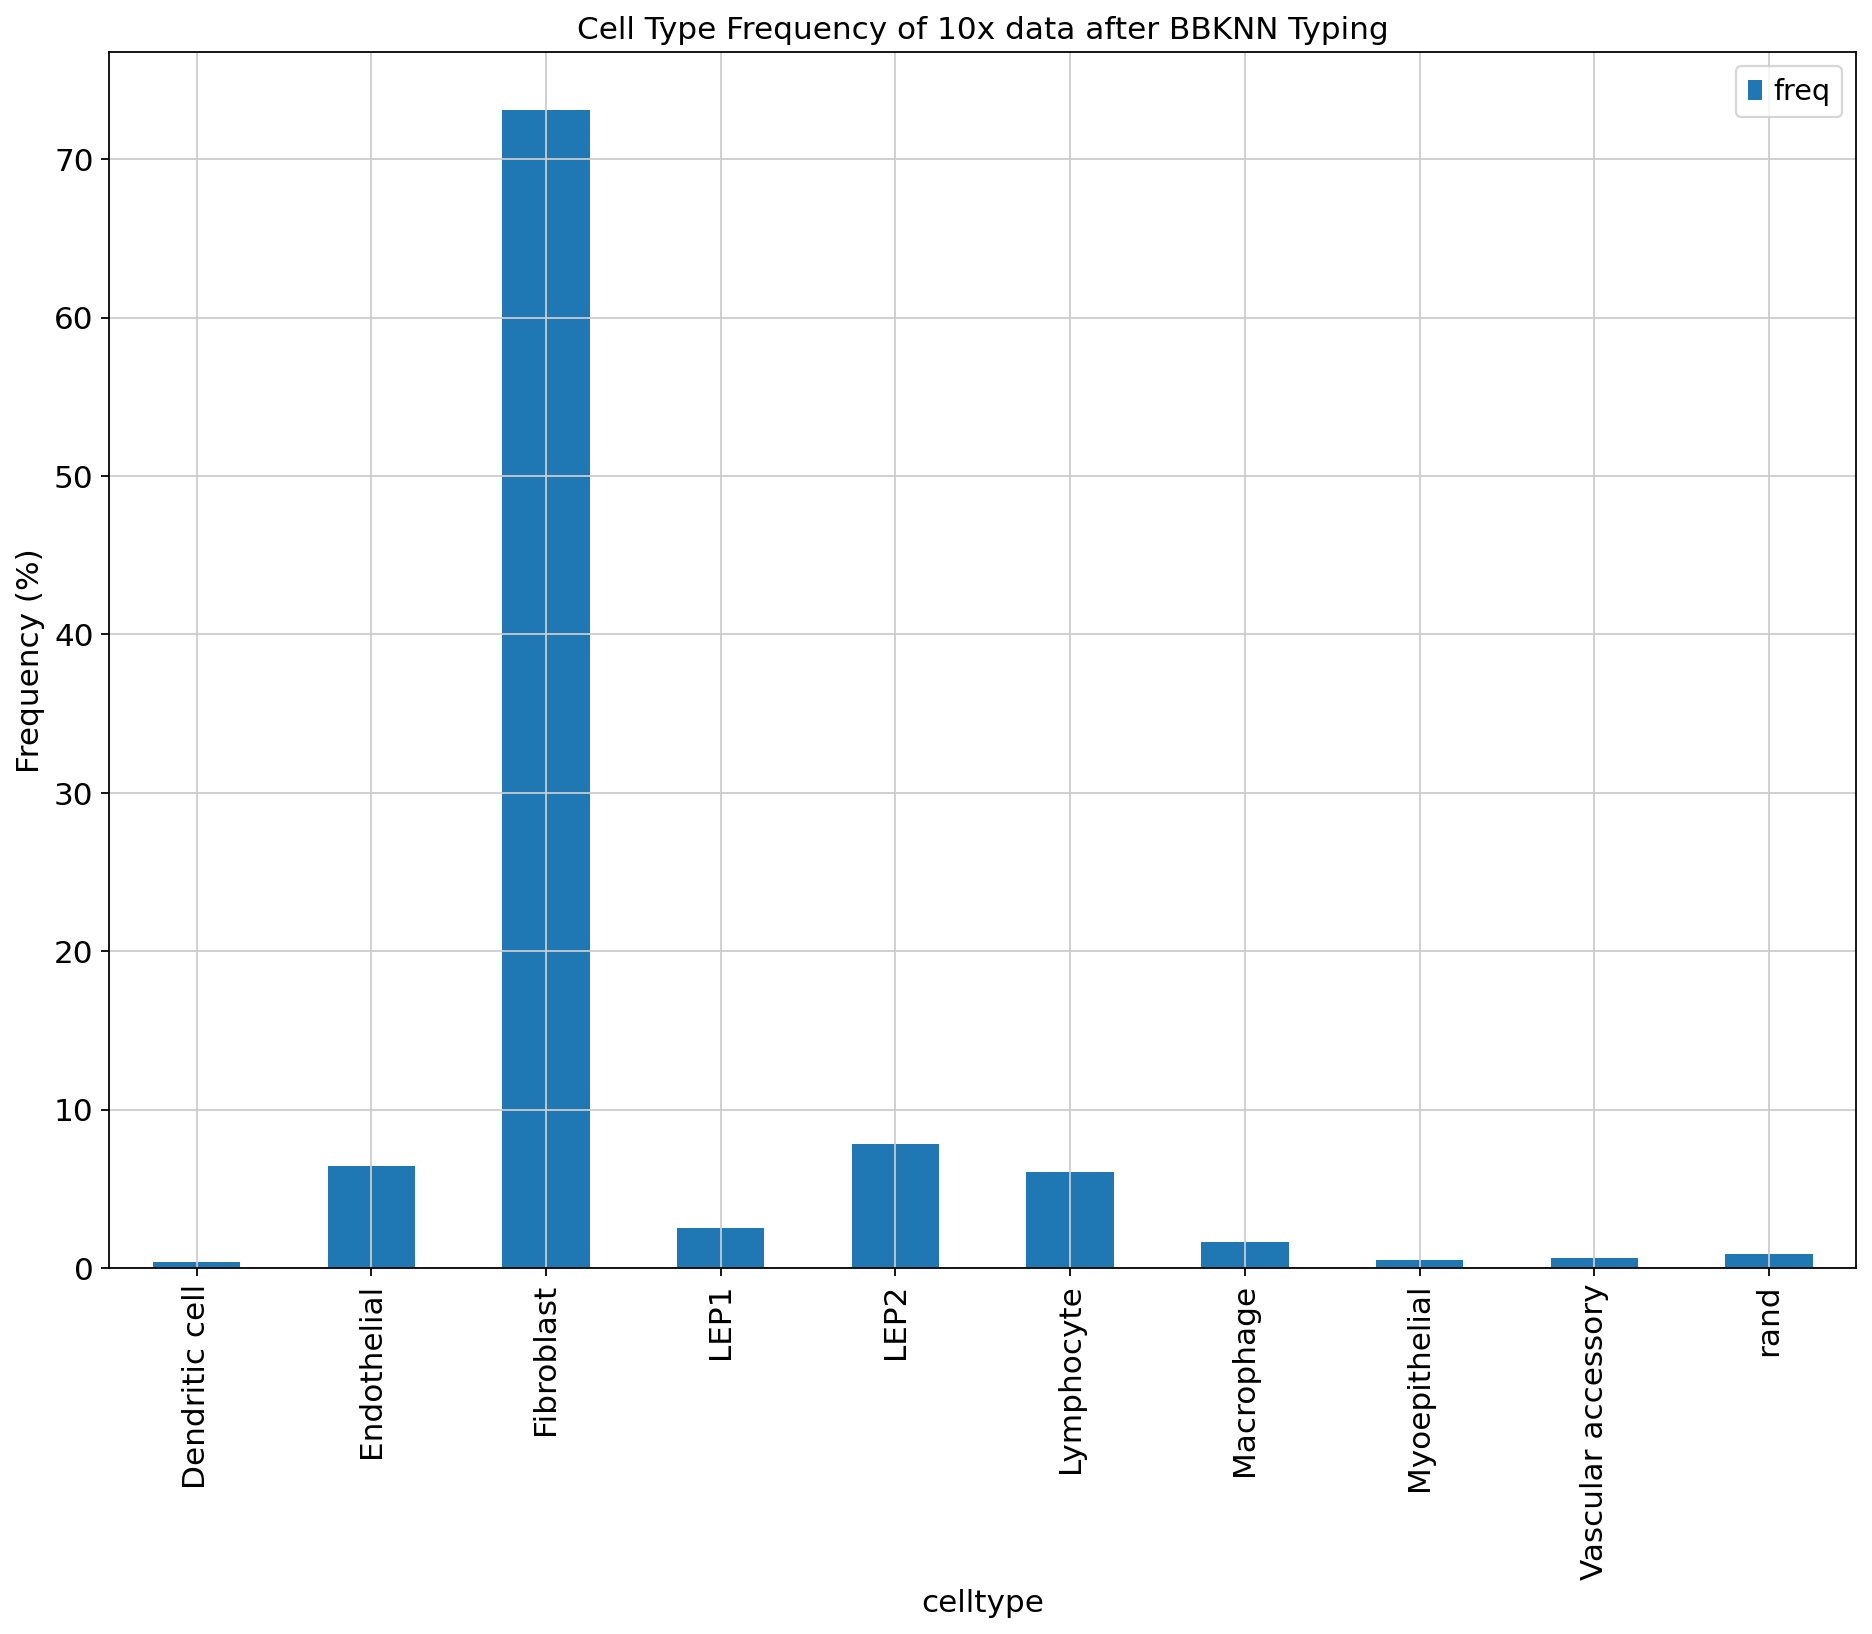

In [72]:
fig, ax = plt.subplots(figsize=(14, 10)) 
freq.plot(x='celltype', y='freq', kind='bar', ax=ax)

# Add labels and title
plt.xlabel('celltype')
plt.ylabel('Frequency (%)')
plt.title('Cell Type Frequency of 10x data after BBKNN Typing')

# Show the plot
plt.show()

In [74]:
pd.crosstab(adata_query.obs["celltype"], adata_query.obs["celltype_orig"])

celltype_orig,Endothelial,Fibroblast,LEP1,LEP2,Lymphocyte,Macrophage,Myoepithelial,rand
celltype,,,,,,,,
Dendritic cell,0,0,0,0,0,3,0,0
Endothelial,51,0,0,0,0,0,0,0
Fibroblast,58,264,58,61,50,7,10,71
LEP1,0,0,14,3,2,0,1,0
LEP2,0,0,9,50,1,1,1,0
Lymphocyte,1,1,0,0,43,3,0,0
Macrophage,0,0,0,0,0,13,0,0
Myoepithelial,0,0,0,0,0,0,4,0
Vascular accessory,1,1,0,1,1,0,1,0


In [76]:
from sklearn.metrics import accuracy_score

accuracy_score(adata_query.obs["celltype_orig"], adata_query.obs["celltype"])

0.5542929292929293

In [78]:
from sklearn.metrics import f1_score
f1_score(adata_query.obs["celltype_orig"], adata_query.obs["celltype"], average="weighted")

0.5131250410010039